In [137]:
import numpy as np

class MCMC:
    def __init__(self, prob, low, high, proposal):
        self.prob = prob
        self.low = low
        self.high = high
        self.proposal = proposal
        
    def _acceptance(self, x, y):
        return min(1, self.prob(y) / self.prob(x))


    def __call__(self, n: int, start = None):
        if start is None:
            results = np.array([np.random.uniform(self.low, self.high)])
        else:
            results = np.array([start])
        
        for i in range(n - 1):
            while True:
                old = results[i]
                new = self.proposal(old)

                while True:
                    u = np.random.uniform(0, 1)
                    if u <= self.high and u >= self.low:
                        break

                if self._acceptance(old, new) >= u:
                    results = np.append(results, new)
                    break
                else:
                    results = np.append(results, old)
                    break
            
        return results

In [120]:
import matplotlib.pyplot as plt


def gauss(x):
    return 1 / np.sqrt(2 * np.pi) * np.exp(-(x**2) / 2)

def exp(x):
    return np.exp(-x)

def linear_proposal(x, width):
    return np.random.uniform(x - width / 2, x + width / 2)

(array([0.12804647, 0.04801743, 0.03201162, 0.06402323, 0.08002904,
        0.16005809, 1.02437175, 3.39323143, 4.20952767, 2.80101651,
        2.4168771 , 0.70425558, 0.41615102, 0.41615102, 0.01600581,
        0.01600581, 0.01600581, 0.        , 0.01600581, 0.        ,
        0.01600581, 0.        , 0.01600581, 0.        , 0.01600581]),
 array([-5.61932956e-01, -4.99455637e-01, -4.36978319e-01, -3.74501001e-01,
        -3.12023683e-01, -2.49546365e-01, -1.87069046e-01, -1.24591728e-01,
        -6.21144099e-02,  3.62908356e-04,  6.28402266e-02,  1.25317545e-01,
         1.87794863e-01,  2.50272181e-01,  3.12749499e-01,  3.75226818e-01,
         4.37704136e-01,  5.00181454e-01,  5.62658772e-01,  6.25136091e-01,
         6.87613409e-01,  7.50090727e-01,  8.12568045e-01,  8.75045364e-01,
         9.37522682e-01,  1.00000000e+00]),
 <BarContainer object of 25 artists>)

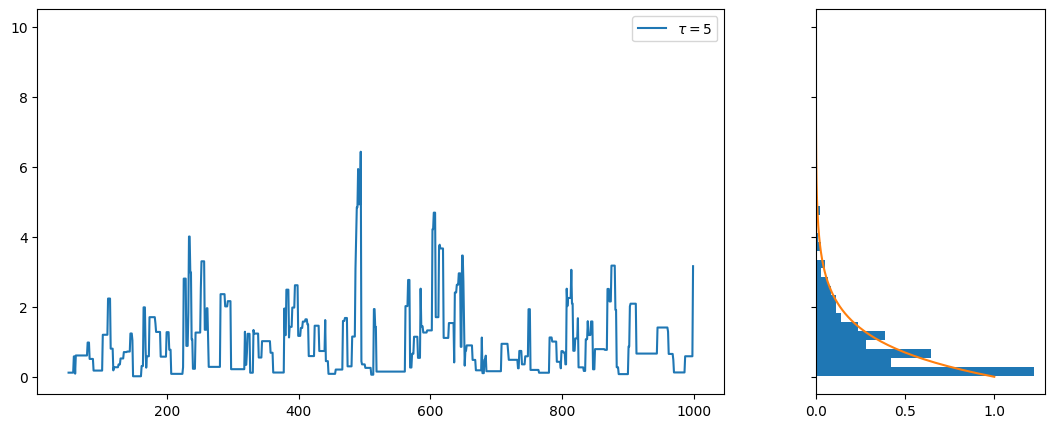

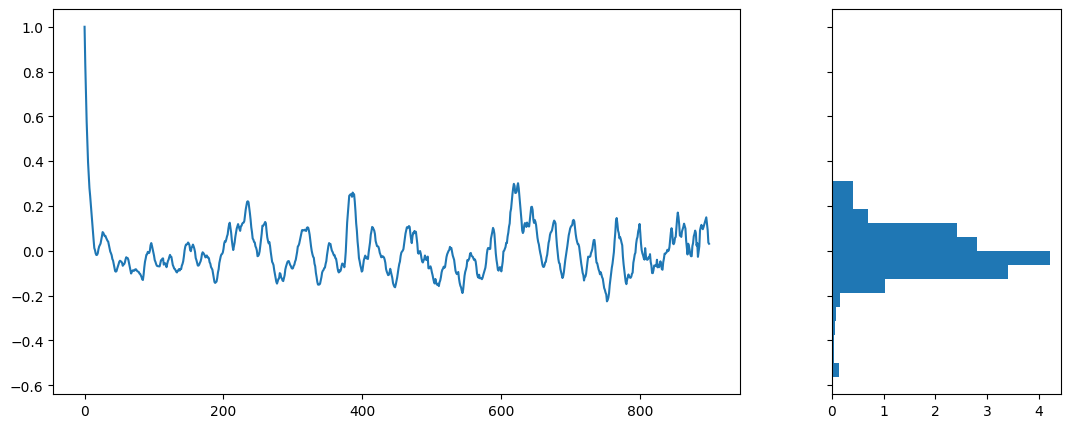

In [138]:
import CompPhy
import CompPhy.autocorrelation

low, high = 0, 10
prob = exp
prop = lambda x: linear_proposal(x, 0.5)
prop = lambda x: np.random.uniform(low, high)
system = MCMC(exp, low, high, prop)
fig, ax = plt.subplots(1, 2, sharey=True, figsize=(13, 5), width_ratios=[3, 1])
n = 1000
data = system(n, 5)
t = range(n)

time = CompPhy.autocorrelation.integrated_autocorrelation(data)

burn = 50
ax[0].plot(t[burn:], data[burn:], label=f"$\\tau = {int(round(time, 0))}$")
ax[1].hist(data[burn:], density=True, bins=25, orientation="horizontal")
ax[0].legend()

x = np.linspace(low, high, 200)
ax[1].plot(prob(x), x)

c = CompPhy.autocorrelation.normalized_autocorrelation(data)

fig, ax = plt.subplots(1, 2, sharey=True, figsize=(13, 5), width_ratios=[3, 1])
ax[0].plot(t[:n - 100], c[:n - 100])
ax[1].hist(c, density=True, bins=25, orientation="horizontal")